**Question-1**
<br>
$x = 0.4$
<br>
$z = 0.1$
<br>
let us take cubic polynomial trajectory for y.
<br>
$y = a0+a1*t+a2*(t^2)+a3*(t^3)$
<br>
y desired velocity,  $dy = a1 + 2*a2*t + 3*a3*(t^2)$
<br>
y desired acceleration,  $ddy = 2*a2 + 6*a3*t$
<br>

let us take t0= 0 and y velocity at t0 be dy0 = 0.5 and tf = 6 and y velocity at tf be dy1 = 0.2
<br>

For t0=0, we get $a0 = y0 , a1 = \dot y0$
<br>
$a2 = \frac{3*(y1-y0)-(2\dot y0 -\dot y1)tf}{tf^2}$
<br>
$a3 = \frac{2*(y0-y1)+(\dot y0 +\dot y1)tf}{tf^3}$  

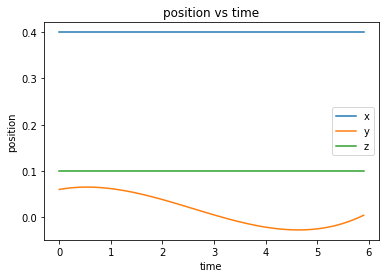

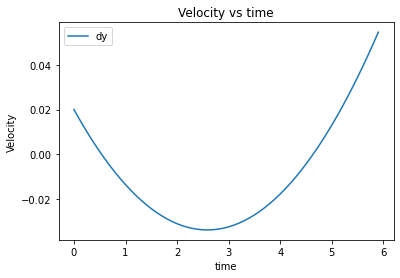

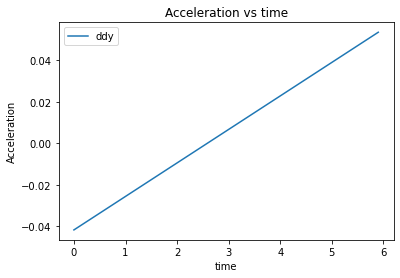

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import math
  

tf= 6
y0 = 0.06
y1 = 0.01
dy0 = 0.02
dy1 = 0.06 

a0 = y0 
a1 = dy0 
a2 = (3*(y1-y0)-(2*dy0+dy1)*tf)/(tf**2)
a3 = (2*(y0-y1)+(dy0+dy1)*tf)/(tf**3)

t = np.arange(0, 6, 0.1)

x = 0.4 + 0*t
z = 0.1 + 0*t
y = a0+a1*t+a2*(t**2)+a3*(t**3)
dy = a1 + 2*a2*t + 3*a3*(t**2)
ddy = 2*a2 + 6*a3*t

# postion plot
plt.plot(t, x, label = 'x')
plt.plot(t, y, label = 'y')
plt.plot(t, z, label = 'z')
plt.legend()
plt.title("position vs time")
plt.xlabel("time")
plt.ylabel("position")
plt.show()

# velocity plot
plt.plot(t, dy, label = 'dy')
# x velocity and z velocity will be 0 as x and z are constants. 
plt.legend()
plt.title("Velocity vs time")
plt.xlabel("time")
plt.ylabel("Velocity")
plt.show()

# acceleration plot
plt.plot(t, ddy, label = 'ddy')
# x acceleration and z acceleration will be 0 as x velocity and z velocity are 0.
plt.legend()
plt.title("Acceleration vs time")
plt.xlabel("time")
plt.ylabel("Acceleration")
plt.show()

**Question-2(Manipulator - PUMA)**
<br>
<br>
We can find the joint angles by using the inverse kinmatics equation.
<br>
let us take cubic polynomial trajectory for joint angle qi.

Let the initial angle be q0 and final angle be q1.
<br>
$qi = a0+a1*t+a2*(t^2)+a3*(t^3)$
<br>
qi desired qngular velocity,  $dq = a1 + 2*a2*t + 3*a3*(t^2)$
<br>
qi desired angular acceleration,  $ddq = 2*a2 + 6*a3*t$
<br>

For t0=0, we get, $a0 = q0 , a1 = \dot q0$
<br>
$a2 = \frac{3*(q1-q0)-(2\dot q0 -\dot q1)tf}{tf^2}$
<br>
$a3 = \frac{2*(q0-q1)+(\dot q0 +\dot q1)tf}{tf^3}$

Laplace transform of qi $Theeta(s) = \frac{a0}{s}+\frac{a1}{s^2}+\frac{a2}{s^3}+\frac{a3}{s^4}=\frac{a0s^3+a1s^2+a2s+a3}{s^4}$

[ 0.14888995  0.17491296 -1.06008263] [ 0.02499479  0.18728199 -1.09189993]


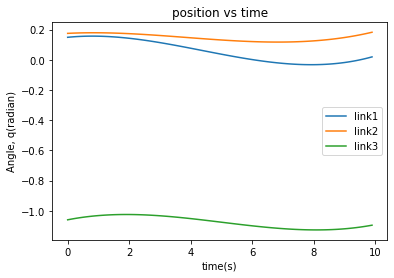

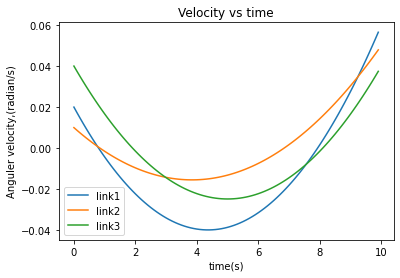

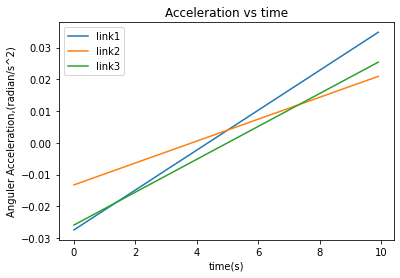

[0.14888994760949723, 0.02, -0.013716854619717313, 0.001047790307981154] [0.1749129587876629, 0.01, -0.006628928986219345, 0.000575261932414623] [-1.0600826270863724, 0.04, -0.012954519225690598, 0.0008636346150460399]


In [ ]:
def inverse_kinematics_PUMA(xc,yc,zc,l1,l2,l3):
    theta1 = math.atan2(yc,xc)
    D = (xc*xc+yc*yc+(l1-zc)*(l1-zc)-l2*l2-l3*l3)/(2*l2*l3)
    if D>=1 or D<=-1:
        print("singular configuration")
    if D>1 or D<-1:
        print("outside workspace")
    theta3 = (math.atan2((-math.sqrt(1-D*D)),D))
    theta2 = math.atan2(zc-l1,(math.sqrt(xc*xc+yc*yc)))-math.atan2((l3*math.sin(theta3)),(l2+l3*math.cos(theta3)))
    theta3 = theta3
    angles=np.array([theta1,theta2,theta3])

    return angles
tf= 10 
x0 = 0.4
y0 = 0.06
z0 = 0.1
x1 = 0.4
y1 = 0.01
z1 = 0.1

l1=l2=l3= 0.25

q0 = inverse_kinematics_PUMA(x0,y0,z0,l1,l2,l3)
q1 = inverse_kinematics_PUMA(x1,y1,z1,l1,l2,l3)
print(q0,q1)


# assuming cubic polynomial trajectory
def coefficients(q0,q1,dq0,dq1,tf):     # assuming cubic polynomial trajectory
  a0 = q0 
  a1 = dq0 
  a2 = (3*(q1-q0)-(2*dq0+dq1)*tf)/(tf**2)
  a3 = (2*(q0-q1)+(dq0+dq1)*tf)/(tf**3)
  A  = [a0, a1, a2, a3]
  return A

def joint_space_trajectory(q0,q1,dq0,dq1,tf):     # assuming cubic polynomial trajectory
  A = coefficients(q0,q1,dq0,dq1,tf)
  a0 = A[0]
  a1 = A[1]
  a2 = A[2]
  a3 = A[3]
  t = np.arange(0, tf, 0.1)

  q = a0+a1*t+a2*(t**2)+a3*(t**3)
  dq = a1 + 2*a2*t + 3*a3*(t**2)
  ddq = 2*a2 + 6*a3*t

  return q,dq,ddq

# for link1
dq0 = 0.02
dq1 = 0.06
cf1 = coefficients(q0[0],q1[0],dq0,dq1,tf)
p1 = joint_space_trajectory(q0[0],q1[0],dq0,dq1,tf)

# for link2
dq0 = 0.01
dq1 = 0.05
cf2 = coefficients(q0[1],q1[1],dq0,dq1,tf)
p2 = joint_space_trajectory(q0[1],q1[1],dq0,dq1,tf)

# for link3
dq0 = 0.04
dq1 = 0.04
cf3 = coefficients(q0[2],q1[2],dq0,dq1,tf)
p3 = joint_space_trajectory(q0[2],q1[2],dq0,dq1,tf)

# Position vs time
t = np.arange(0, tf, 0.1)
plt.plot(t,p1[0], label = 'link1')
plt.plot(t,p2[0], label = 'link2')
plt.plot(t,p3[0], label = 'link3')
plt.xlabel("time(s)")
plt.ylabel("Angle, q(radian)")
plt.title("position vs time")
plt.legend()
plt.show()

# Velocity vs time
t = np.arange(0, tf, 0.1)
plt.plot(t,p1[1], label = 'link1')
plt.plot(t,p2[1], label = 'link2')
plt.plot(t,p3[1], label = 'link3')
plt.xlabel("time(s)")
plt.ylabel("Anguler velocity,(radian/s)")
plt.title("Velocity vs time")
plt.legend()
plt.show()

# Acceleration vs time
t = np.arange(0, tf, 0.1)
plt.plot(t,p1[2], label = 'link1')
plt.plot(t,p2[2], label = 'link2')
plt.plot(t,p3[2], label = 'link3')
plt.xlabel("time(s)")
plt.ylabel("Anguler Acceleration,(radian/s^2)")
plt.title("Acceleration vs time")
plt.legend()
plt.show()

print(cf1,cf2,cf3)

In [ ]:
from sympy import *

l1=0.25
l2=0.25
l3=0.25
m1=0.8
m2=0.8
m3=0.8
I1 = 0
I2 = m2*(l2**2)/3
I3 = m3*(l3**2)/3

q1, q2, q3=symbols("q1 q2 q3")

J_vc1 = np.array([[0, 0, 0],[0, 0, 0],[0, 0, 0]])
J_vc2 = np.array([[-(l2/2)*sin(q1)*cos(q2), (-l2/2)*cos(q1)*sin(q2), 0],[(l2/2)*cos(q1)*cos(q2), -(l2/2)*sin(q1)*sin(q2), 0],[0, (l2/2)*cos(q2), 0]])
J_vc3 = np.array([[-((l3/2)*cos(q3)+l2)*sin(q1)*cos(q2), -((l3/2)*cos(q3)+l2)*cos(q1)*sin(q2), 0.5*l3*cos(q1)*cos(q2)*sin(q3)],[((l3/2)*cos(q3)+l2)*cos(q1)*cos(q2), -((l3/2)*cos(q3)+l2)*sin(q1)*sin(q2), 0.5*l3*sin(q1)*cos(q2)*sin(q3)],[0, l2*cos(q2), 0.5*l3*cos(q2)]])

d1=m1*np.matmul(np.transpose(J_vc1), J_vc1)
d2=m2*np.matmul(np.transpose(J_vc2), J_vc2)
d3=m3*np.matmul(np.transpose(J_vc3), J_vc3)

d_sum=np.add(np.add(d1,d2),d3)
I_sum=np.array([[I1+I2+I3, 0, 0],[0, I2+I3, I3],[0, I3, I3]])
D_q= simplify(np.add(d_sum,I_sum))
print("D_q =",D_q,"\n")

q=np.array([q1,q2,q3])

c = [[[0,0,0],[0,0,0],[0,0,0]],[[0,0,0],[0,0,0],[0,0,0]],[[0,0,0],[0,0,0],[0,0,0]]]

# Calculating Christoffer Symbols
for k in range(0,3):
  for j in range(0,3):
    for i in range(0,3):
      c[i][j][k] = 0.5 * (diff(D_q[k][j], q[i]) + diff(D_q[k][i], q[j]) - diff(D_q[i][j], q[k]))
    
V_q = 13 * sin(q[0]) + 45 * (5 * sin(q[0]) + 3 * sin(q[0]))

Phi = [0] * 3
ct = 0
d=0
T = [0] * 3
q1d, q1dd, q2d, q2dd, q3d,q3dd = symbols("q1d q1dd q2d q2dd q3d q3dd")
qad = np.array([q1d, q2d, q3d])
qadd = np.array([q1dd, q2dd, q3dd])
for k in range(3): #corresponds to each link
      Phi[k] = diff(V_q, q[k])
      for j in range(3):
        d = d + D_q[k][j] * qadd[j] 
        for i in range(3):
          # print("i =",i,c[i][j][k])
          ct = ct + c[i][j][k] * qad[i] * qad[j]
          # print("ct =", ct)
      T[k] = d + ct + Phi[k]
      print("T(",k+1,") =",simplify(T[k]),"\n")




D_q = [[0.0125*cos(q2)**2*cos(q3)**2 + 0.05*cos(q2)**2*cos(q3) + 0.0625*cos(q2)**2 + 0.0333333333333333, 0, 0], [0, -0.0125*sin(q2)**2*sin(q3)**2 + 0.05*sin(q2)**2*cos(q3) + 0.0125*sin(q2)**2 + 0.0958333333333333, 0.0125*cos(2*q2) - 0.0015625*cos(2*q2 - 2*q3) - 0.00625*cos(2*q2 - q3) + 0.00625*cos(2*q2 + q3) + 0.0015625*cos(2*q2 + 2*q3) + 0.0291666666666667], [0, 0.0125*cos(2*q2) - 0.0015625*cos(2*q2 - 2*q3) - 0.00625*cos(2*q2 - q3) + 0.00625*cos(2*q2 + q3) + 0.0015625*cos(2*q2 + 2*q3) + 0.0291666666666667, -0.0125*cos(q2)**2*cos(q3)**2 + 0.025*cos(q2)**2 + 0.0166666666666667]] 

T( 1 ) = -2*q1d*q2d*(0.0125*cos(q3)**2 + 0.05*cos(q3) + 0.0625)*sin(q2)*cos(q2) - 2*q1d*q3d*(0.0125*cos(q3) + 0.025)*sin(q3)*cos(q2)**2 + q1dd*(0.0125*cos(q2)**2*cos(q3)**2 + 0.05*cos(q2)**2*cos(q3) + 0.0625*cos(q2)**2 + 0.0333333333333333) + 373*cos(q1) 

T( 2 ) = q1d**2*(0.0125*cos(q3)**2 + 0.05*cos(q3) + 0.0625)*sin(q2)*cos(q2) - 2*q1d*q2d*(0.0125*cos(q3)**2 + 0.05*cos(q3) + 0.0625)*sin(q2)*cos(q2) - 2*q1d*

In [ ]:
!pip install slycot
!pip install control

In [ ]:
%matplotlib inline

import numpy as np
import sympy
import seaborn as sns
import matplotlib.pyplot as plt
import control

**PD Control**

closed loop equation used:

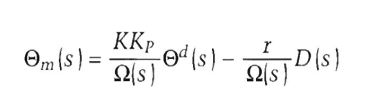

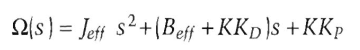

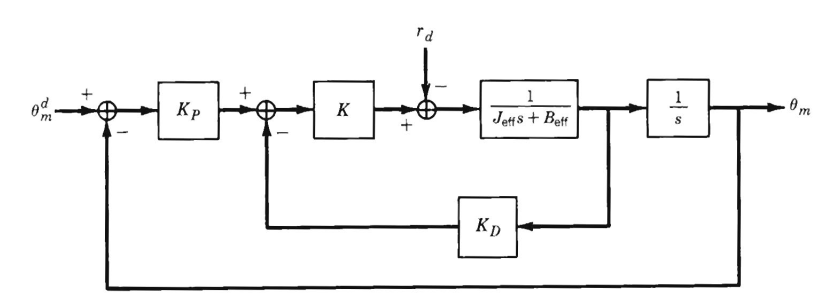


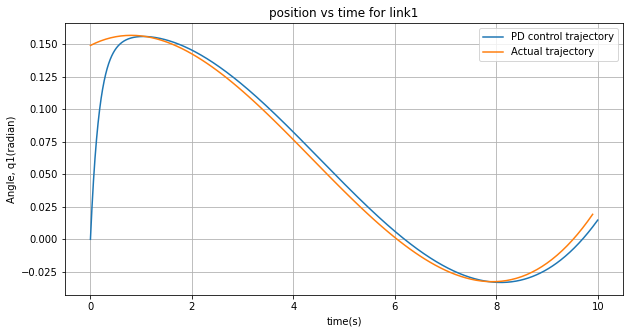

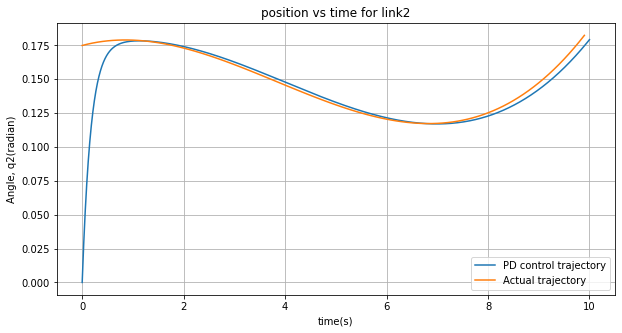

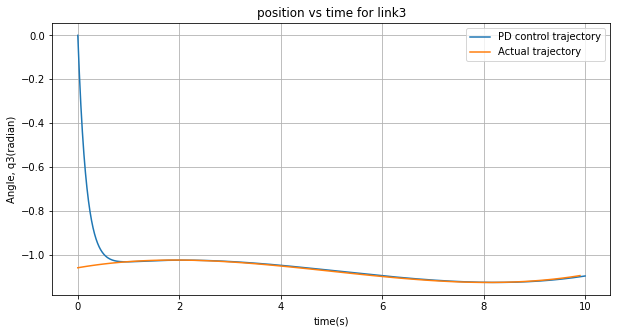

In [ ]:
def pd_control(K,Kp,Kd):
  Jeff = 0.0008
  Beff = 0.015
  r = 0.005
  d = 1
  omega = [Jeff, (Beff+K*Kd), K*Kp]
  Tf1 = control.tf(1, omega)

  D_s = control.tf([d],[1, 0])

  theeta_t1 = control.tf([cf1[0], 2*cf1[1], 3*cf1[2], 4*cf1[3]],[1, 0, 0, 0, 0])
  theeta_t2 = control.tf([cf2[0], 2*cf2[1], 3*cf2[2], 4*cf2[3]],[1, 0, 0, 0, 0])
  theeta_t3 = control.tf([cf3[0], 2*cf1[1], 3*cf3[2], 4*cf3[3]],[1, 0, 0, 0, 0])

  TF_close1_pd = (K*Kp*Tf1) + (-r*D_s*Tf1/theeta_t1)
  TF_close2_pd = (K*Kp*Tf1) + (-r*D_s*Tf1/theeta_t2)
  TF_close3_pd = (K*Kp*Tf1) + (-r*D_s*Tf1/theeta_t3)

  # %% Defining signals :
  t0 = 0
  t1 = 10
  dt = 0.01
  nt = int ( t1 / dt ) + 1 # Number of points of sim time
  t = np . linspace ( t0 , t1 , nt )

  u1=[]
  u2=[]
  u3=[]

  tn = 0
  for i in range(0,nt):
    tn = tn + dt
    a1 = cf1[0] +cf1[1]*tn + cf1[2]*tn**2 + cf1[3]*tn**3
    a2 = cf2[0] +cf2[1]*tn + cf2[2]*tn**2 + cf2[3]*tn**3
    a3 = cf3[0] +cf3[1]*tn + cf3[2]*tn**2 + cf3[3]*tn**3

    u1 = u1 + [a1]
    u2 = u2 + [a2]
    u3 = u3 + [a3]

  # %% Simulation :
  (t1_pd , y1_pd) = control.forced_response (TF_close1_pd , t , u1 , X0 =0)
  (t2_pd , y2_pd) = control.forced_response (TF_close2_pd , t , u2 , X0 =0)
  (t3_pd , y3_pd) = control.forced_response (TF_close3_pd , t , u3 , X0 =0)

  return (t1_pd , y1_pd), (t2_pd , y2_pd), (t3_pd , y3_pd)

TFM = pd_control(10,30,5)
(t1_pd , y1__pd) = TFM[0]
(t2__pd , y2__pd) = TFM[1]
(t3__pd , y3__pd) = TFM[2]

# plotting
t = np.arange(0, 10, 0.1)
# print(t,"\n",p1[0])

# link1
plt.figure(figsize=(10, 5))
plt . plot (t1_pd , y1_pd, label= 'PD control trajectory')
plt.plot(t,p1[0], label = 'Actual trajectory')
plt.xlabel("time(s)")
plt.ylabel("Angle, q1(radian)")
plt.title("position vs time for link1")
plt . grid ()
plt.legend()
plt.show()

# link2
plt.figure(figsize=(10, 5))
plt . plot (t2_pd , y2_pd, label= 'PD control trajectory')
plt.plot(t,p2[0], label = 'Actual trajectory')
plt.xlabel("time(s)")
plt.ylabel("Angle, q2(radian)")
plt.title("position vs time for link2")
plt . grid ()
plt.legend()
plt.show()

# link3
plt.figure(figsize=(10, 5))
plt . plot (t3_pd , y3_pd, label= 'PD control trajectory')
plt.plot(t,p3[0], label = 'Actual trajectory')
plt.xlabel("time(s)")
plt.ylabel("Angle, q3(radian)")
plt.title("position vs time for link3")
plt . grid ()
plt.legend()
plt.show()


**Feedforward PD control**

Closed loop equation used:     

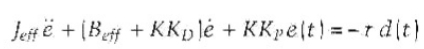

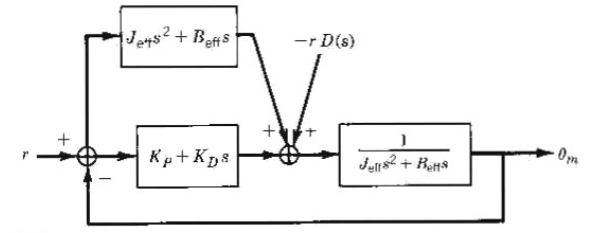

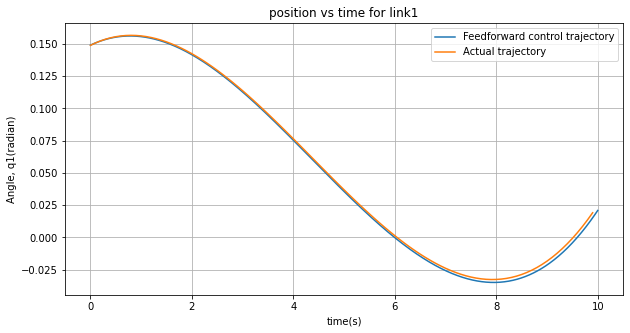

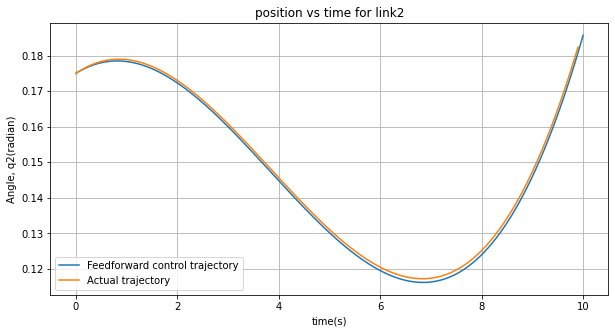

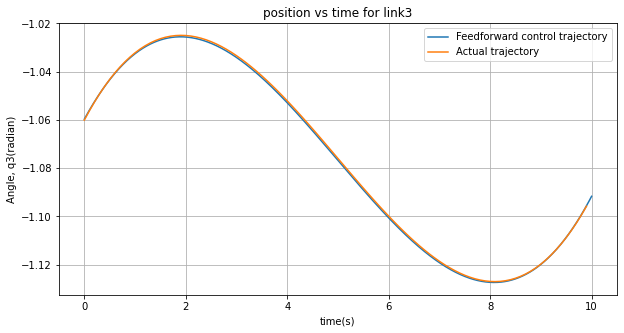

In [ ]:
def feedforward(K,Kp,Kd):
  Jeff = 0.0008
  Beff = 0.015
  r = 0.005
  d = 1
  omega = [Jeff, (Beff+K*Kd), K*Kp]
  Tf1 = control.tf(1, omega)
  D_s = control.tf([d],[1, 0])
  theeta_t1 = control.tf([cf1[0], 2*cf1[1], 3*cf1[2], 4*cf1[3]],[1, 0, 0, 0, 0])
  theeta_t2 = control.tf([cf2[0], 2*cf2[1], 3*cf2[2], 4*cf2[3]],[1, 0, 0, 0, 0])
  theeta_t3 = control.tf([cf3[0], 2*cf1[1], 3*cf3[2], 4*cf3[3]],[1, 0, 0, 0, 0])

  TF_close1_ff = (1) + (-r*D_s*Tf1/theeta_t1)
  TF_close2_ff = (1) + (-r*D_s*Tf1/theeta_t2)
  TF_close3_ff = (1) + (-r*D_s*Tf1/theeta_t3)

  # %% Defining signals :
  t0 = 0
  t1 = 10
  dt = 0.01
  nt = int ( t1 / dt ) + 1 # Number of points of sim time
  t = np . linspace ( t0 , t1 , nt )

  u1=[]
  u2=[]
  u3=[]

  tn = 0
  for i in range(0,nt):
    tn = tn + dt
    a1 = cf1[0] +cf1[1]*tn + cf1[2]*tn**2 + cf1[3]*tn**3
    a2 = cf2[0] +cf2[1]*tn + cf2[2]*tn**2 + cf2[3]*tn**3
    a3 = cf3[0] +cf3[1]*tn + cf3[2]*tn**2 + cf3[3]*tn**3

    u1 = u1 + [a1]
    u2 = u2 + [a2]
    u3 = u3 + [a3]


  # %% Simulation :
  (t1_ff , y1_ff) = control.forced_response (TF_close1_ff , t , u1 , X0 =0)
  (t2_ff , y2_ff) = control.forced_response (TF_close2_ff , t , u2 , X0 =0)
  (t3_ff , y3_ff) = control.forced_response (TF_close3_ff , t , u3 , X0 =0)
  return (t1_ff , y1_ff), (t2_ff , y2_ff), (t3_ff , y3_ff)

TFN = feedforward(0.8,10,5)
(t1_ff , y1_ff) = TFN[0]
(t2_ff , y2_ff) = TFN[1]
(t3_ff , y3_ff) = TFN[2]

# plotting
t = np.arange(0, 10, 0.1)

# link1
plt.figure(figsize=(10, 5))
plt . plot (t1_ff , y1_ff, label= 'Feedforward control trajectory')
plt.plot(t,p1[0], label = 'Actual trajectory')
plt.xlabel("time(s)")
plt.ylabel("Angle, q1(radian)")
plt.title("position vs time for link1")
plt . grid ()
plt.legend()
plt.show()

# link2
plt.figure(figsize=(10, 5))
plt . plot (t2_ff , y2_ff, label= 'Feedforward control trajectory')
plt.plot(t,p2[0], label = 'Actual trajectory')
plt.xlabel("time(s)")
plt.ylabel("Angle, q2(radian)")
plt.title("position vs time for link2")
plt . grid ()
plt.legend()
plt.show()

# link3
plt.figure(figsize=(10, 5))
plt . plot (t3_ff , y3_ff, label= 'Feedforward control trajectory')
plt.plot(t,p3[0], label = 'Actual trajectory')
plt.xlabel("time(s)")
plt.ylabel("Angle, q3(radian)")
plt.title("position vs time for link3")
plt . grid ()
plt.legend()
plt.show()


question-4 20% error in link1

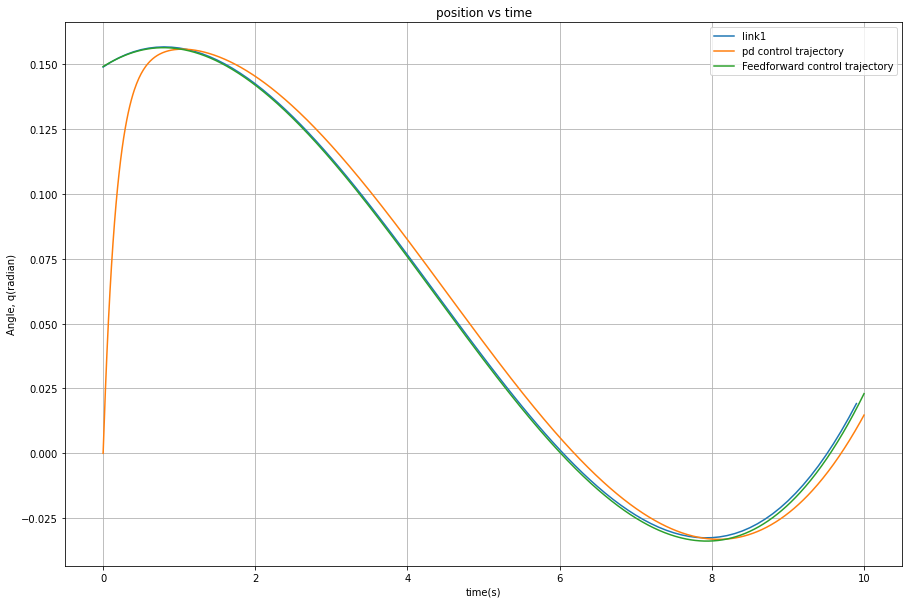

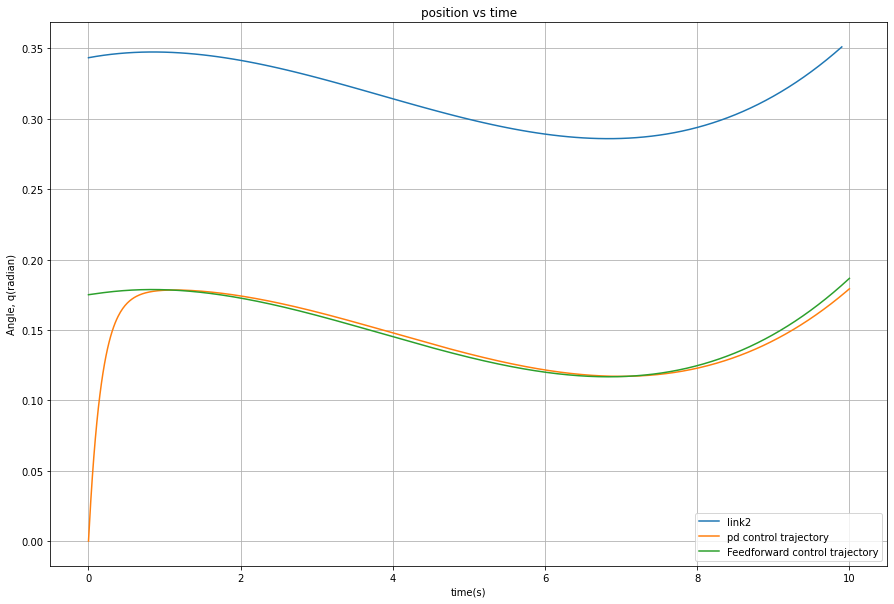

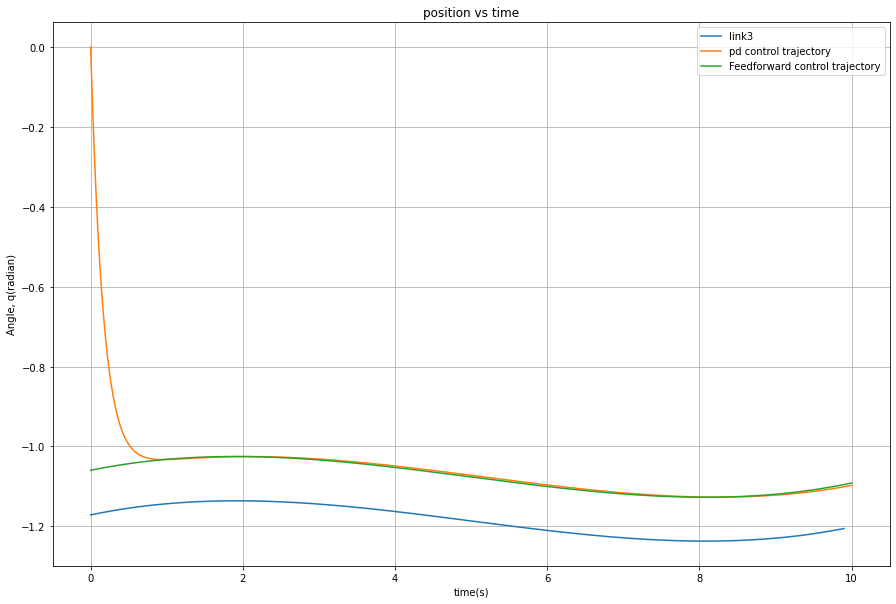

In [ ]:
l1 = l1 - 0.2*l1
tf= 10 
x0 = 0.4
y0 = 0.06
z0 = 0.1
x1 = 0.4
y1 = 0.01
z1 = 0.1

q0 = inverse_kinematics_PUMA(x0,y0,z0,l1,l2,l3)
q1 = inverse_kinematics_PUMA(x1,y1,z1,l1,l2,l3)

# for link1
dq0 = 0.02
dq1 = 0.06
cf1_n = coefficients(q0[0],q1[0],dq0,dq1,tf)
p1_n = joint_space_trajectory(q0[0],q1[0],dq0,dq1,tf)

# for link2
dq0 = 0.01
dq1 = 0.05
cf2_n = coefficients(q0[1],q1[1],dq0,dq1,tf)
p2_n = joint_space_trajectory(q0[1],q1[1],dq0,dq1,tf)

# for link3
dq0 = 0.04
dq1 = 0.04
cf3_n = coefficients(q0[2],q1[2],dq0,dq1,tf)
p3_n = joint_space_trajectory(q0[2],q1[2],dq0,dq1,tf)

# new pd control
TFM_e = pd_control(0.8,40,5)
(t1_pd , y1__pd) = TFM_e[0]
(t2__pd , y2__pd) = TFM_e[1]
(t3__pd , y3__pd) = TFM_e[2]

# new feedforward control
TFN_e = feedforward(0.8,20,3)
(t1_ff , y1_ff) = TFN_e[0]
(t2_ff , y2_ff) = TFN_e[1]
(t3_ff , y3_ff) = TFN_e[2]

# Position vs time link1
plt.figure(figsize=(15, 10))
t = np.arange(0, tf, 0.1)
plt.plot(t,p1_n[0], label = 'link1')
plt.plot (t1_pd , y1_pd, label= 'pd control trajectory')
plt.plot (t1_ff , y1_ff, label= 'Feedforward control trajectory')
plt.xlabel("time(s)")
plt.ylabel("Angle, q(radian)")
plt.title("position vs time")
plt.legend()
plt . grid ()
plt.show()

# Position vs time link1
plt.figure(figsize=(15, 10))
t = np.arange(0, tf, 0.1)
plt.plot(t,p2_n[0], label = 'link2')
plt.plot (t2_pd , y2_pd, label= 'pd control trajectory')
plt.plot (t2_ff , y2_ff, label= 'Feedforward control trajectory')
plt.xlabel("time(s)")
plt.ylabel("Angle, q(radian)")
plt.title("position vs time")
plt.legend()
plt . grid ()
plt.show()

# Position vs time link1
plt.figure(figsize=(15, 10))
t = np.arange(0, tf, 0.1)
plt.plot(t,p3_n[0], label = 'link3')
plt.plot (t3_pd , y3_pd, label= 'pd control trajectory')
plt.plot (t3_ff , y3_ff, label= 'Feedforward control trajectory')
plt.xlabel("time(s)")
plt.ylabel("Angle, q(radian)")
plt.title("position vs time")
plt.legend()
plt . grid ()
plt.show()

Question-5 additional random disturbance of 0.1N

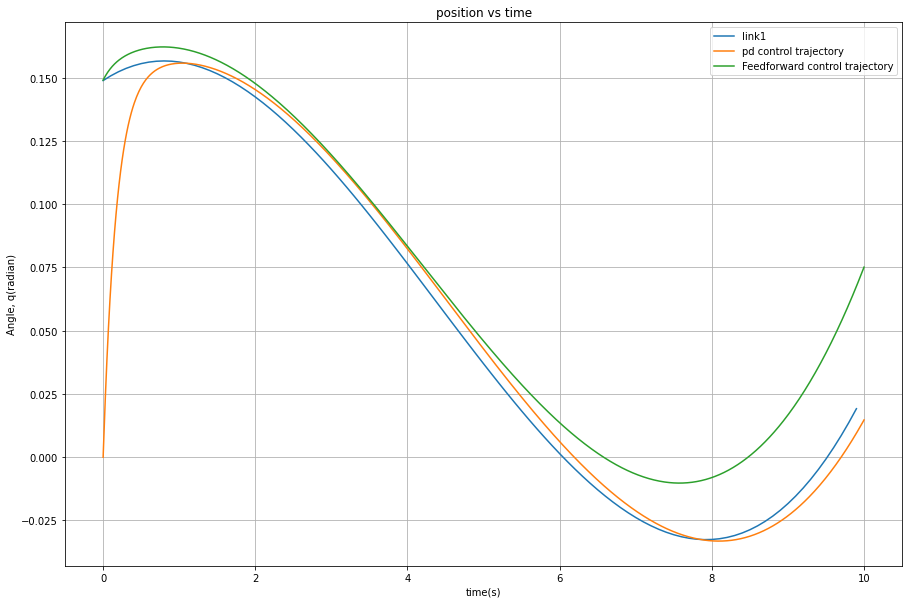

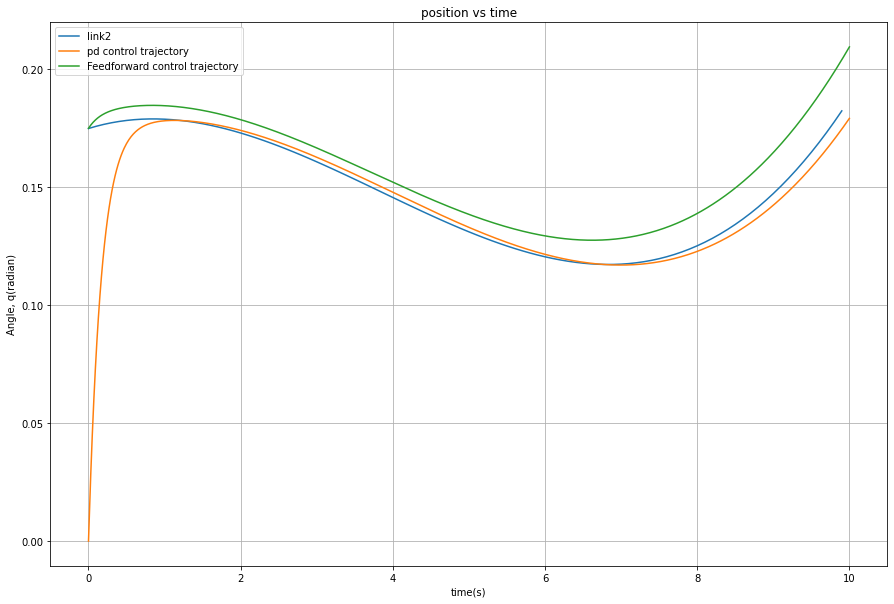

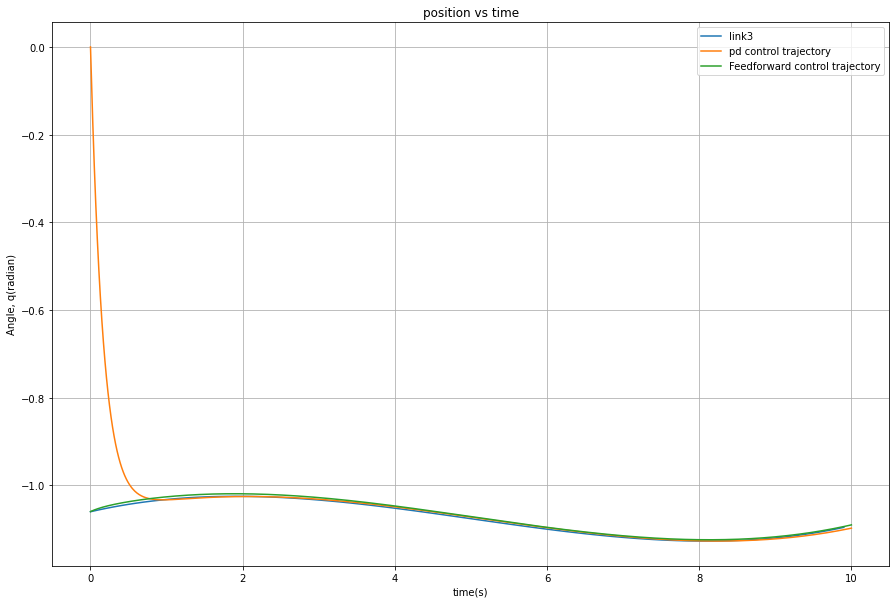

In [ ]:
l1 = l2 = l3 = 0.25

q0 = inverse_kinematics_PUMA(x0,y0,z0,l1,l2,l3)
q1 = inverse_kinematics_PUMA(x1,y1,z1,l1,l2,l3)

# for link1
dq0 = 0.02
dq1 = 0.06
cf1_n = coefficients(q0[0],q1[0],dq0,dq1,tf)
p1_n = joint_space_trajectory(q0[0],q1[0],dq0,dq1,tf)

# for link2
dq0 = 0.01
dq1 = 0.05
cf2_n = coefficients(q0[1],q1[1],dq0,dq1,tf)
p2_n = joint_space_trajectory(q0[1],q1[1],dq0,dq1,tf)

# for link3
dq0 = 0.04
dq1 = 0.04
cf3_n = coefficients(q0[2],q1[2],dq0,dq1,tf)
p3_n = joint_space_trajectory(q0[2],q1[2],dq0,dq1,tf)

def pd_control_disturbance(K,Kp,Kd,dn):
  Jeff = 0.0008
  Beff = 0.015
  r = 0.005
  d = 1
  omega = [Jeff, (Beff+K*Kd), K*Kp]
  Tf1 = control.tf(1, omega)

  D_s = control.tf([d],[1, 0])
  Dn_s = control.tf([dn],[1, 0])

  theeta_t1 = control.tf([cf1[0], 2*cf1[1], 3*cf1[2], 4*cf1[3]],[1, 0, 0, 0, 0])
  theeta_t2 = control.tf([cf2[0], 2*cf2[1], 3*cf2[2], 4*cf2[3]],[1, 0, 0, 0, 0])
  theeta_t3 = control.tf([cf3[0], 2*cf1[1], 3*cf3[2], 4*cf3[3]],[1, 0, 0, 0, 0])

  TF_close1_pd = (K*Kp*Tf1) + (-r*D_s*Tf1/theeta_t1) + (Dn_s*Tf1/theeta_t1)
  TF_close2_pd = (K*Kp*Tf1) + (-r*D_s*Tf1/theeta_t2) + (Dn_s*Tf1/theeta_t1)
  TF_close3_pd = (K*Kp*Tf1) + (-r*D_s*Tf1/theeta_t3) + (Dn_s*Tf1/theeta_t1)

  # %% Defining signals :
  t0 = 0
  t1 = 10
  dt = 0.01
  nt = int ( t1 / dt ) + 1 # Number of points of sim time
  t = np . linspace ( t0 , t1 , nt )

  u1=[]
  u2=[]
  u3=[]

  tn = 0
  for i in range(0,nt):
    tn = tn + dt
    a1 = cf1[0] +cf1[1]*tn + cf1[2]*tn**2 + cf1[3]*tn**3
    a2 = cf2[0] +cf2[1]*tn + cf2[2]*tn**2 + cf2[3]*tn**3
    a3 = cf3[0] +cf3[1]*tn + cf3[2]*tn**2 + cf3[3]*tn**3

    u1 = u1 + [a1]
    u2 = u2 + [a2]
    u3 = u3 + [a3]

  # %% Simulation :
  (t1_pd , y1_pd) = control.forced_response (TF_close1_pd , t , u1 , X0 =0)
  (t2_pd , y2_pd) = control.forced_response (TF_close2_pd , t , u2 , X0 =0)
  (t3_pd , y3_pd) = control.forced_response (TF_close3_pd , t , u3 , X0 =0)

  return (t1_pd , y1_pd), (t2_pd , y2_pd), (t3_pd , y3_pd)

def feedforward_disturbance(K,Kp,Kd,dn):
  Jeff = 0.0008
  Beff = 0.015
  r = 0.005
  d = 1
  omega = [Jeff, (Beff+K*Kd), K*Kp]
  Tf1 = control.tf(1, omega)
  D_s = control.tf([d],[1, 0])
  Dn_s = control.tf([dn],[1, 0])
  theeta_t1 = control.tf([cf1[0], 2*cf1[1], 3*cf1[2], 4*cf1[3]],[1, 0, 0, 0, 0])
  theeta_t2 = control.tf([cf2[0], 2*cf2[1], 3*cf2[2], 4*cf2[3]],[1, 0, 0, 0, 0])
  theeta_t3 = control.tf([cf3[0], 2*cf1[1], 3*cf3[2], 4*cf3[3]],[1, 0, 0, 0, 0])

  TF_close1_ff = (1) + (-r*D_s*Tf1/theeta_t1) + (Dn_s*Tf1/theeta_t1)
  TF_close2_ff = (1) + (-r*D_s*Tf1/theeta_t2) + (Dn_s*Tf1/theeta_t2)
  TF_close3_ff = (1) + (-r*D_s*Tf1/theeta_t3) +  (Dn_s*Tf1/theeta_t3)

  # %% Defining signals :
  t0 = 0
  t1 = 10
  dt = 0.01
  nt = int ( t1 / dt ) + 1 # Number of points of sim time
  t = np . linspace ( t0 , t1 , nt )

  u1=[]
  u2=[]
  u3=[]

  tn = 0
  for i in range(0,nt):
    tn = tn + dt
    a1 = cf1[0] +cf1[1]*tn + cf1[2]*tn**2 + cf1[3]*tn**3
    a2 = cf2[0] +cf2[1]*tn + cf2[2]*tn**2 + cf2[3]*tn**3
    a3 = cf3[0] +cf3[1]*tn + cf3[2]*tn**2 + cf3[3]*tn**3

    u1 = u1 + [a1]
    u2 = u2 + [a2]
    u3 = u3 + [a3]


  # %% Simulation :
  (t1_ff , y1_ff) = control.forced_response (TF_close1_ff , t , u1 , X0 =0)
  (t2_ff , y2_ff) = control.forced_response (TF_close2_ff , t , u2 , X0 =0)
  (t3_ff , y3_ff) = control.forced_response (TF_close3_ff , t , u3 , X0 =0)
  return (t1_ff , y1_ff), (t2_ff , y2_ff), (t3_ff , y3_ff)

# new pd control
TFM_e = pd_control_disturbance(0.8,40,5,0.1)
(t1_pd , y1__pd) = TFM_e[0]
(t2__pd , y2__pd) = TFM_e[1]
(t3__pd , y3__pd) = TFM_e[2]

# new feedforward control
TFN_e = feedforward_disturbance(0.8,20,3,0.1)
(t1_ff , y1_ff) = TFN_e[0]
(t2_ff , y2_ff) = TFN_e[1]
(t3_ff , y3_ff) = TFN_e[2]

# Position vs time link1
plt.figure(figsize=(15, 10))
t = np.arange(0, tf, 0.1)
plt.plot(t,p1_n[0], label = 'link1')
plt.plot (t1_pd , y1_pd, label= 'pd control trajectory')
plt.plot (t1_ff , y1_ff, label= 'Feedforward control trajectory')
plt.xlabel("time(s)")
plt.ylabel("Angle, q(radian)")
plt.title("position vs time")
plt.legend()
plt . grid ()
plt.show()

# Position vs time link1
plt.figure(figsize=(15, 10))
t = np.arange(0, tf, 0.1)
plt.plot(t,p2_n[0], label = 'link2')
plt.plot (t2_pd , y2_pd, label= 'pd control trajectory')
plt.plot (t2_ff , y2_ff, label= 'Feedforward control trajectory')
plt.xlabel("time(s)")
plt.ylabel("Angle, q(radian)")
plt.title("position vs time")
plt.legend()
plt . grid ()
plt.show()

# Position vs time link1
plt.figure(figsize=(15, 10))
t = np.arange(0, tf, 0.1)
plt.plot(t,p3_n[0], label = 'link3')
plt.plot (t3_pd , y3_pd, label= 'pd control trajectory')
plt.plot (t3_ff , y3_ff, label= 'Feedforward control trajectory')
plt.xlabel("time(s)")
plt.ylabel("Angle, q(radian)")
plt.title("position vs time")
plt.legend()
plt . grid ()
plt.show()